# Predicting Wine Type

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [14]:
# Read data

import pandas as pd

# Read in white wine data 
#white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

# Read in red wine data 
#red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
red = pd.read_csv('winequality-red.csv', sep=';')

white.head()
#red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Exploration

In [15]:
white.info()
#red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [16]:
white.sample()
#red.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4020,6.4,0.37,0.12,5.9,0.056,6.0,91.0,0.99536,3.06,0.46,8.4,4


In [17]:
white.describe()
#red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Visualizing The Data

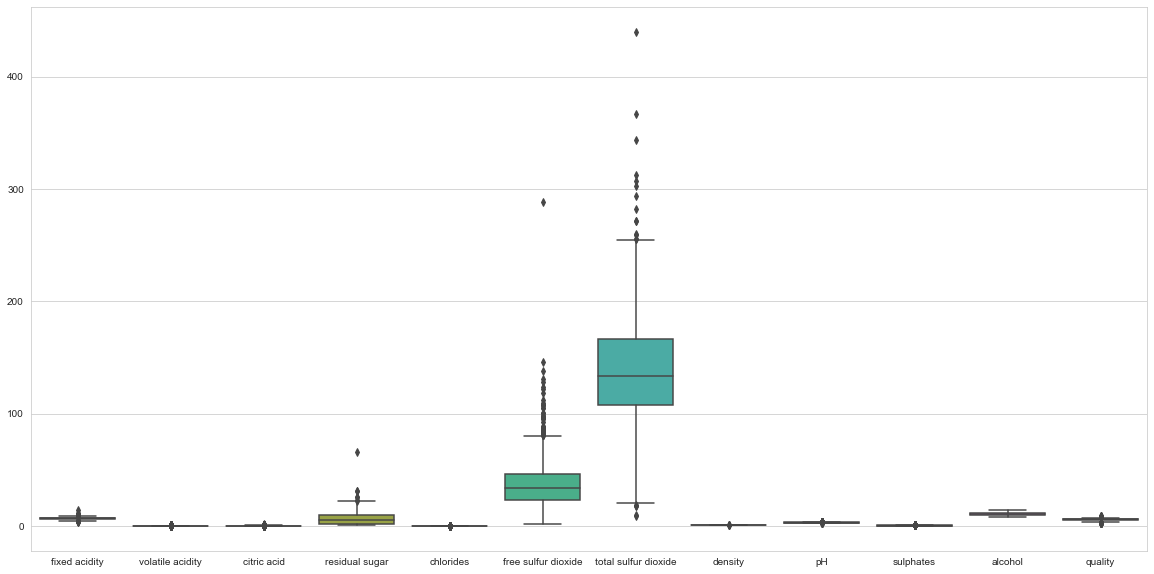

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

sns.set_style("whitegrid")
sns.boxplot(data = white) 
#sns.boxplot(data = red) 

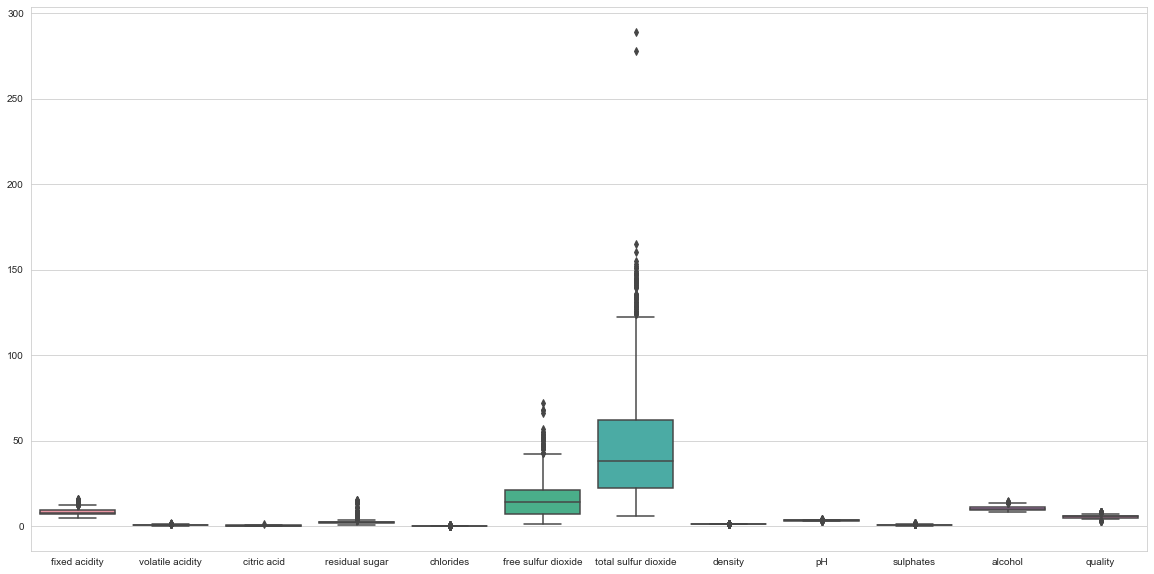

In [19]:
sns.boxplot(data = red) 

# Preprocess Data

In [20]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

wines.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1853,5.8,0.24,0.39,1.5,0.054,37.0,158.0,0.9932,3.21,0.52,9.3,6,0


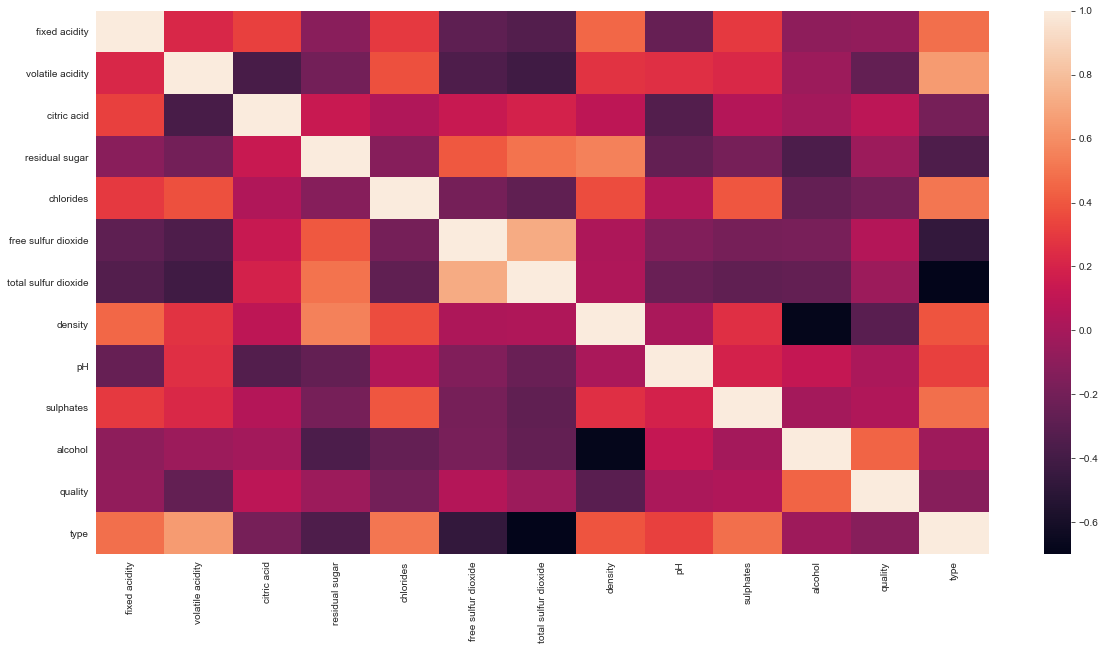

In [21]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# Split Train and Test

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data 
X=wines.iloc[:,0:-1]  # 12 dimensions

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.head()
#X_train.info()
#X_test.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1700,7.1,0.12,0.32,9.6,0.054,64.0,162.0,0.99620,3.40,0.41,9.4,5
5199,6.8,0.12,0.30,12.9,0.049,32.0,88.0,0.99654,3.20,0.35,9.9,6
3340,7.7,0.38,0.40,2.0,0.038,28.0,152.0,0.99060,3.18,0.32,12.9,6
86,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
5587,6.1,0.20,0.17,1.6,0.048,46.0,129.0,0.99100,3.30,0.43,11.4,6


# Standardize The Data

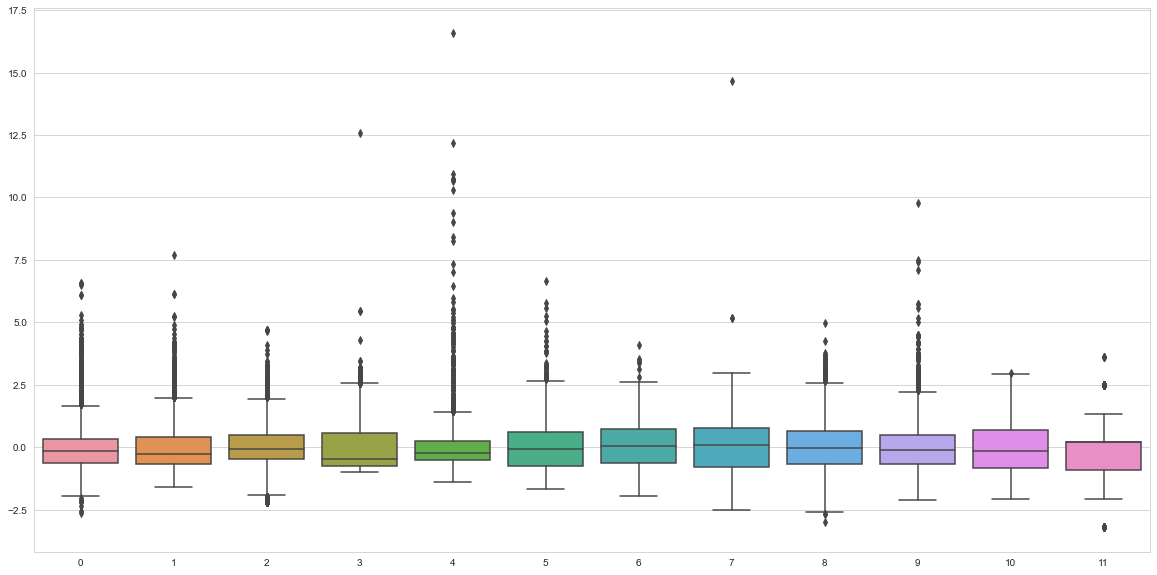

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)  # scaler should be fitted to train only not the entire set

X_test = scaler.transform(X_test)

sns.boxplot(data = X_train) 

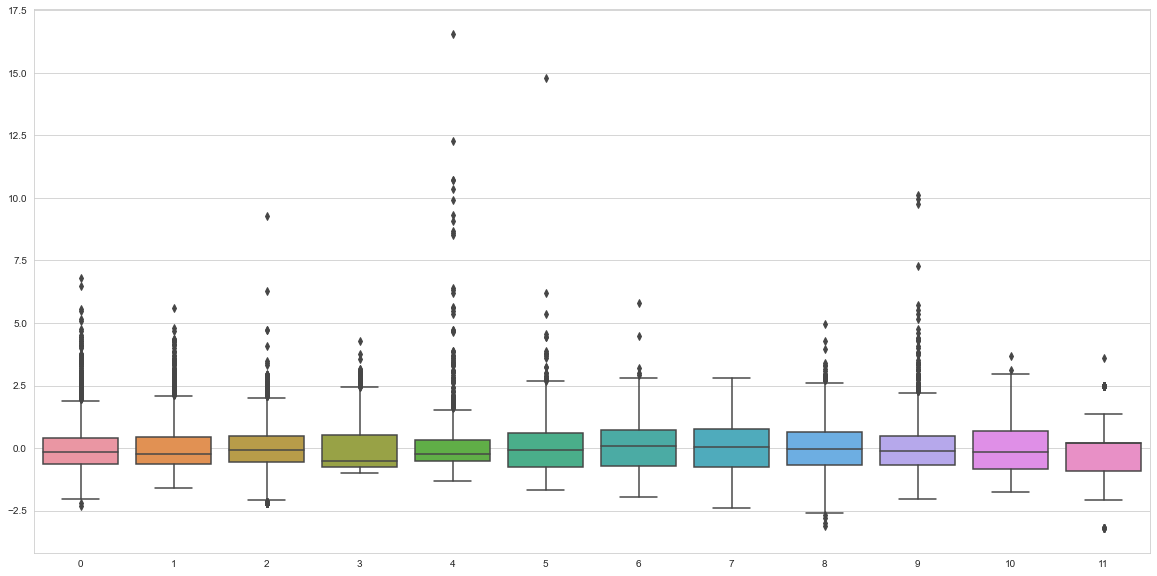

In [24]:
sns.boxplot(data = X_test)

# MLP Data Model

In [25]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(12,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [42]:
#X_train.shape
#model.input_shape
#model.summary()

In [43]:
#model.get_config()

In [47]:
#model.get_weights()

# Training

In [45]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=20, batch_size=1, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
4352/4352 [==============================] - 3s 707us/step - loss: 0.0088 - accuracy: 0.9989 - val_loss: 0.0334 - val_accuracy: 0.9944
Epoch 2/20
4352/4352 [==============================] - 3s 673us/step - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.0348 - val_accuracy: 0.9949
Epoch 3/20
4352/4352 [==============================] - 3s 655us/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0390 - val_accuracy: 0.9944
Epoch 4/20
4352/4352 [==============================] - 3s 664us/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0369 - val_accuracy: 0.9953
Epoch 5/20
4352/4352 [==============================] - 3s 670us/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 0.0373 - val_accuracy: 0.9953
Epoch 6/20
4352/4352 [==============================] - 3s 698us/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.0376 - val_accuracy: 0.9953
Epoch 7/20
4352/4352 [==============================] - 3s 669us/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0392 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


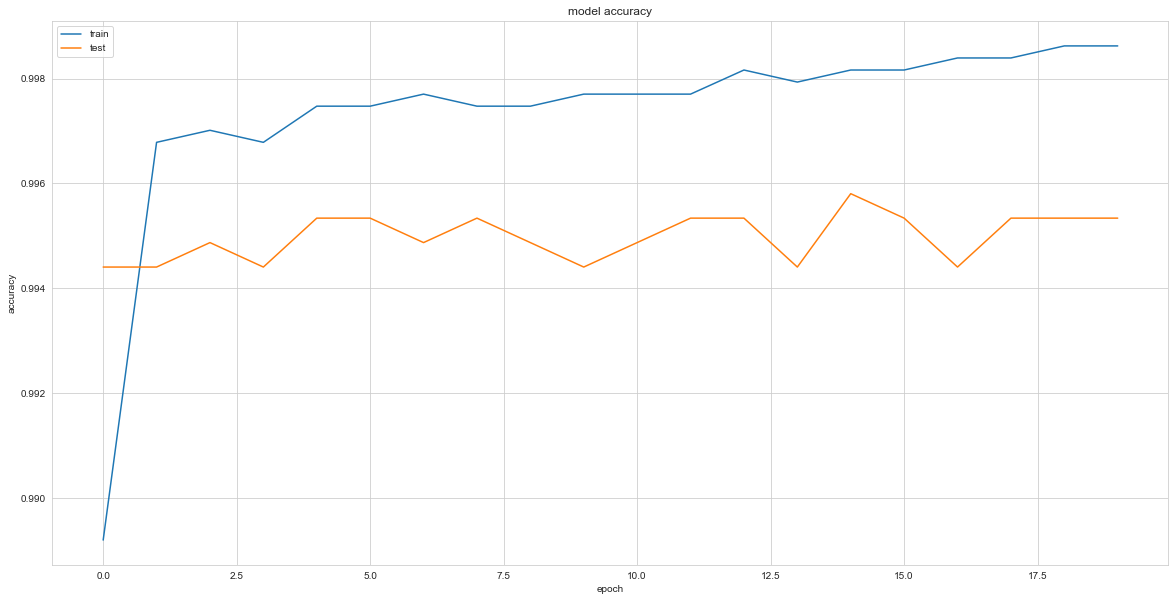

In [33]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Evaluate Model

In [34]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

68/68 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9953
[0.03134661540389061, 0.9953380227088928]


In [35]:
preds = model.predict(X_test)
print(preds)

[[4.1827857e-03]
 [9.9815655e-01]
 [1.4541149e-03]
 ...
 [1.5577674e-04]
 [1.6026795e-03]
 [7.2026189e-05]]


In [36]:
preds = np.where(preds > 0.5, 1, 0)
print(preds)

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [37]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot
cmap = matplotlib.cm.get_cmap('Reds')

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    ax = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

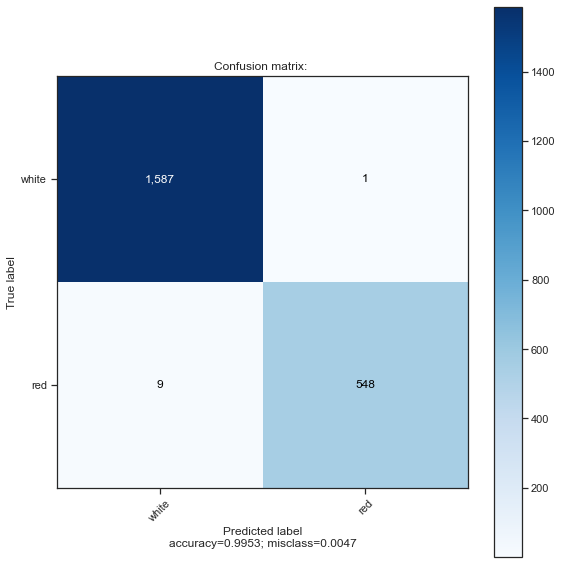

In [38]:
from sklearn.metrics import confusion_matrix

title = 'Confusion matrix: '  
sns.set(style='ticks')
target_names = ['white','red']  # white = 0, red = 1
cm =confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, target_names, title=title, cmap=None, normalize=False)